<a href="https://colab.research.google.com/github/jhbeann/Bigdata_R/blob/main/Chapter2_section2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 전처리 개요

### 데이터 변환

  1) 표준 정규화
  - rnorm() : 난수발생
  - rnorm(n, mean=k, sd=s)
    - 평균 k , 표준편차 s 정규분포 따르는 n개의 난수 생성

In [1]:
# 한국인, 일본인 각 성인 1000명 육류 소비량 데이터 생
meat_consumption_korean <- rnorm(n=1000, mean=53.9, sd=5)
meat_consumption_japan <- rnorm(n=1000, mean=32.9, sd=4)

# 데이터 프레임
meat_consumption <- data.frame(meat_consumption_korean,meat_consumption_japan)

# 확인
head(meat_consumption)

,meat_consumption_korean,meat_consumption_japan
,<dbl>,<dbl>
1,61.78184,31.92582
2,47.28861,38.21450
3,46.58991,30.43864
4,56.50503,34.66509
5,49.53051,31.66493
6,45.34029,28.68450


#### 히스토그램 함수 :hist()
- hist(x, breaks="Sturges", freq=TRUE, main ="title")
  - x: 히스토그램 대상
  - breaks : 히스토그램 계급구간 (기본값 :"Sturges")
  - freq = TRUE (실제 빈도수 표시) //  FALSE : 상대 빈도수 표시:비율
  - main : 그래프 제목

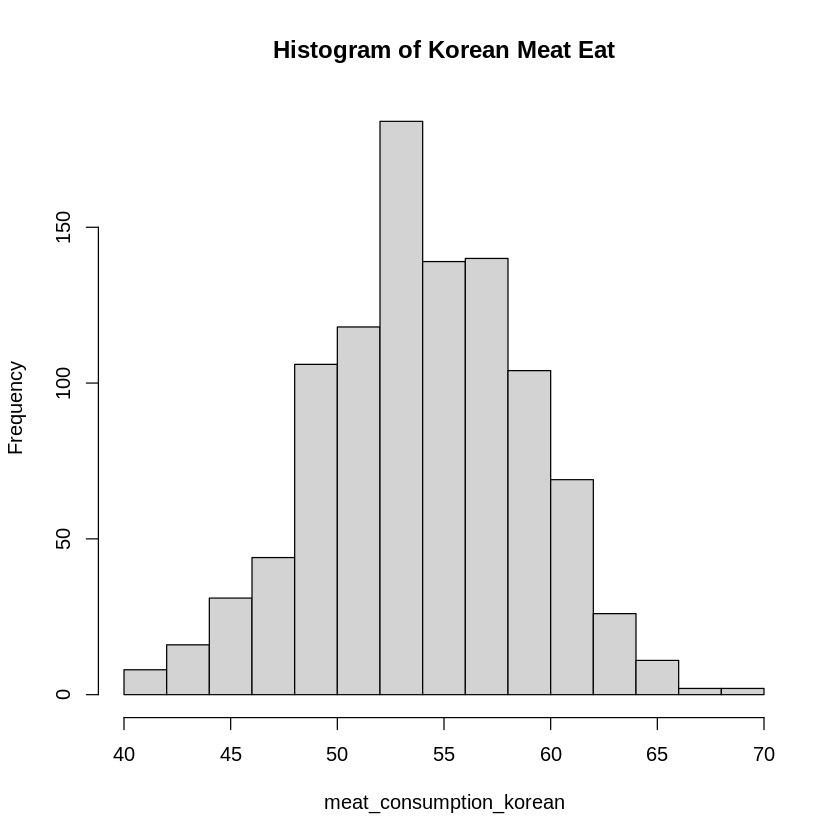

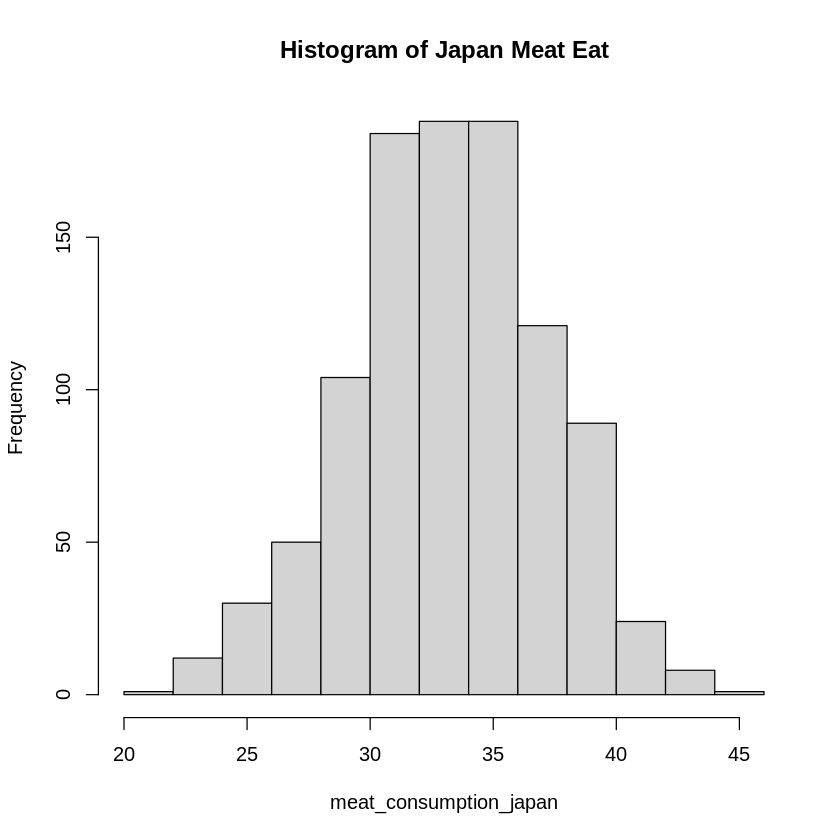

In [2]:
# 한국인 육류소비량 히스토그램
hist(meat_consumption_korean, freq = TRUE, main = "Histogram of Korean Meat Eat")
# 일본인 육류소비량 히스토그램
hist(meat_consumption_japan, freq = TRUE, main = "Histogram of Japan Meat Eat")


#### z 표준화
-  Z-표준화된 컬럼을 추가
- 표준정규화함수에 의한 변환 scale() 함수 이용


In [4]:
S1 <- scale(meat_consumption_korean)
S2 <- scale(meat_consumption_japan)
meat_consumption <- transform(meat_consumption, z_korean = S1, z_japan = S2)

head(meat_consumption)


,meat_consumption_korean,meat_consumption_japan,z_korean,z_japan
,<dbl>,<dbl>,<dbl>,<dbl>
1,61.78184,31.92582,1.6184966,-0.3229940
2,47.28861,38.21450,-1.4112047,1.2784017
3,46.58991,30.43864,-1.5572620,-0.7016984
4,56.50503,34.66509,0.5154187,0.3745532
5,49.53051,31.66493,-0.9425522,-0.3894293
6,45.34029,28.68450,-1.8184854,-1.1483863


#### 표준정규화 수식을 직접 입력
- 기존 데이터프레임에 새로운 Z-표준화된 컬럼을 추가

In [5]:
S1 <- (meat_consumption_korean - mean(meat_consumption_korean))/sd(meat_consumption_korean)
S2 <- (meat_consumption_japan - mean(meat_consumption_japan))/sd(meat_consumption_japan)
meat_consumption <- transform(meat_consumption, z2_korean = S1, z2_japan = S2)

head(meat_consumption)

# z와 z2는 똑같다

,meat_consumption_korean,meat_consumption_japan,z_korean,z_japan,z2_korean,z2_japan
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,61.78184,31.92582,1.6184966,-0.3229940,1.6184966,-0.3229940
2,47.28861,38.21450,-1.4112047,1.2784017,-1.4112047,1.2784017
3,46.58991,30.43864,-1.5572620,-0.7016984,-1.5572620,-0.7016984
4,56.50503,34.66509,0.5154187,0.3745532,0.5154187,0.3745532
5,49.53051,31.66493,-0.9425522,-0.3894293,-0.9425522,-0.3894293
6,45.34029,28.68450,-1.8184854,-1.1483863,-1.8184854,-1.1483863


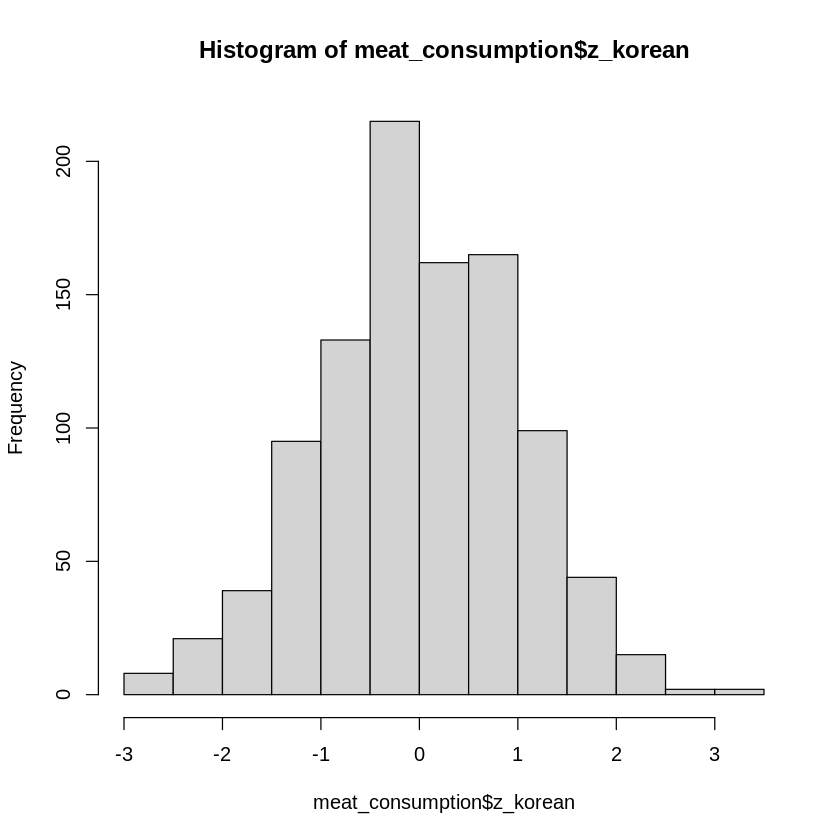

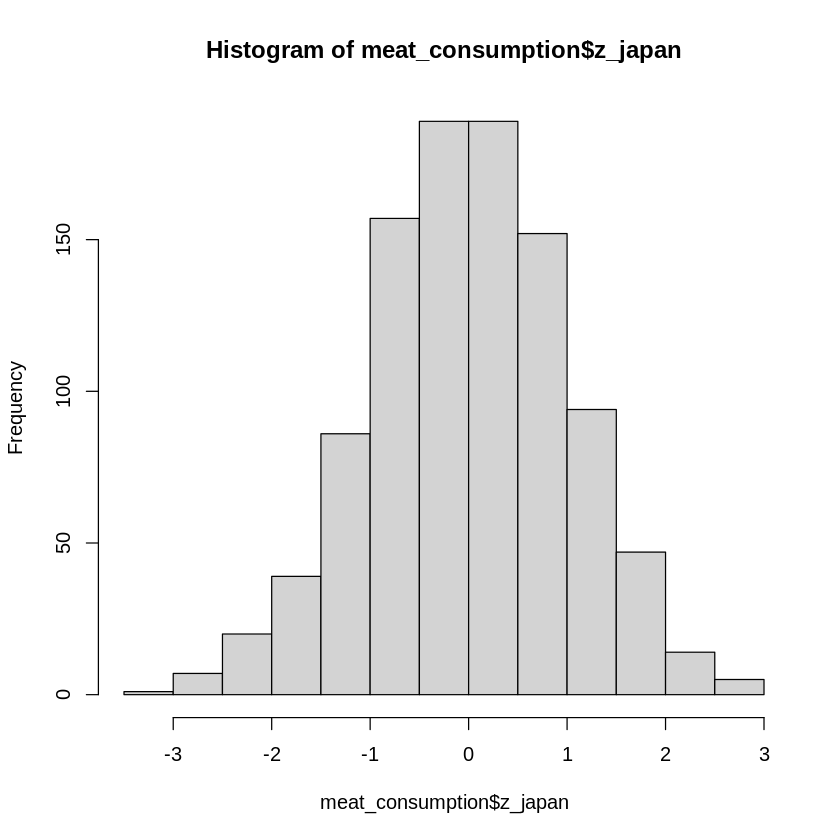

In [6]:
# 표준화된 데이터에 대한 히스토그램
hist(meat_consumption$z_korean)
hist(meat_consumption$z_japan)

### Min - Max 정규화
 - 연속형 변수의 값을 0~1 값으로 변환
 - 스케일이 다른 변수를  상호간 비교 가능
#### 스케일 함수
scale(x, center = Min, scale  =(Max -Min))

- 행렬 유형의 데이터를 정규화
- x : 숫자 벡터 유형의 객체


In [7]:
# 1. scale() 함수로 표준화
Min <- min(meat_consumption_korean)
Max <- max(meat_consumption_korean)

S1 <- scale(meat_consumption_korean, center = Min, scale =(Max -Min))

Min <- min(meat_consumption_japan)
Max <- max(meat_consumption_japan)

S2 <- scale(meat_consumption_japan, center = Min, scale =(Max -Min))
meat_consumption <- transform(meat_consumption, mm_korean = S1, mm_japan = S2)

In [8]:
head(meat_consumption)

,meat_consumption_korean,meat_consumption_japan,z_korean,z_japan,z2_korean,z2_japan,mm_korean,mm_japan
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,61.78184,31.92582,1.6184966,-0.3229940,1.6184966,-0.3229940,0.7498731,0.4605920
2,47.28861,38.21450,-1.4112047,1.2784017,-1.4112047,1.2784017,0.2485907,0.7354622
3,46.58991,30.43864,-1.5572620,-0.7016984,-1.5572620,-0.7016984,0.2244247,0.3955896
4,56.50503,34.66509,0.5154187,0.3745532,0.5154187,0.3745532,0.5673622,0.5803219
5,49.53051,31.66493,-0.9425522,-0.3894293,-0.9425522,-0.3894293,0.3261321,0.4491888
6,45.34029,28.68450,-1.8184854,-1.1483863,-1.8184854,-1.1483863,0.1812037,0.3189183


In [10]:
# 2. 수식 이용해 표준화

Min <- min(meat_consumption_korean)
Max <- max(meat_consumption_korean)

S1 <- (meat_consumption$meat_consumption_korean - Min) / (Max-Min)

Min <- min(meat_consumption_japan)
Max <- max(meat_consumption_japan)

S2 <- (meat_consumption$meat_consumption_japan - Min) /(Max - Min)
meat_consumption <- transform(meat_consumption, mm2_korean = S1, mm2_japan = S2)

head(meat_consumption)

,meat_consumption_korean,meat_consumption_japan,z_korean,z_japan,z2_korean,z2_japan,mm_korean,mm_japan,mm2_korean,mm2_japan
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,61.78184,31.92582,1.6184966,-0.3229940,1.6184966,-0.3229940,0.7498731,0.4605920,0.7498731,0.4605920
2,47.28861,38.21450,-1.4112047,1.2784017,-1.4112047,1.2784017,0.2485907,0.7354622,0.2485907,0.7354622
3,46.58991,30.43864,-1.5572620,-0.7016984,-1.5572620,-0.7016984,0.2244247,0.3955896,0.2244247,0.3955896
4,56.50503,34.66509,0.5154187,0.3745532,0.5154187,0.3745532,0.5673622,0.5803219,0.5673622,0.5803219
5,49.53051,31.66493,-0.9425522,-0.3894293,-0.9425522,-0.3894293,0.3261321,0.4491888,0.3261321,0.4491888
6,45.34029,28.68450,-1.8184854,-1.1483863,-1.8184854,-1.1483863,0.1812037,0.3189183,0.1812037,0.3189183


#### 2) 정규분포 변환
- 왜도 : 분포의 대칭 척도


In [11]:
data(USJudgeRatings)
df <- USJudgeRatings
head(df)

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8
"BURNS,E.B.",6.2,8.8,8.7,8.5,7.9,8.0,8.1,8.0,8.0,8.0,8.6,8.6


In [14]:
# 왜도, 첨도 관련 통계적 테스트 지원하는 패키지 ==> moments

install.packages("moments")
library(moments)

# 왜도 계산
# CONT : 변호사와 판사 접촉 수 PHYS: 신체적 능력
skewness(df$CONT, na.rm = T)  # 1.08597247962763 >0 양의 왜도
skewness(df$PHYS, na.rm = T)  # -1.55821546422931 <0 음의 왜도


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 1.085972

[1] -1.558215

1. 로그 변환
- CONT : 양의 왜도 => log(x) 변환
- PHYS : 음의 왜도 => log(max(x + 1)-x) 

In [17]:
# 로그변환
df$CONT1 <-log(df$CONT)
df$PHYS1 <- log(max(df$PHYS + 1)- df$PHYS)

skewness(df$CONT1, na.rm = T)
skewness(df$PHYS1,  na.rm = T)
# 0.655557188669261
# 0.582435774875044

[1] 0.6555572

[1] 0.5824358

2. log10() 변환
- 양의 왜도 : log10() 변환
- 음의 왜도 : log10(max(x +1) -x) 변환
==> 실행결과는 log() 와 동일

#### 3) 범주화, 이산형화
- 나누는 기준 결정 중요 : cutting line(구분선) 


[1] 73.5

student_Name,Math_score
<chr>,<dbl>
철수,52
영희,92
미영,84
시완,71
미경,65
영환,81
숙경,66
부영,77
민섭,73


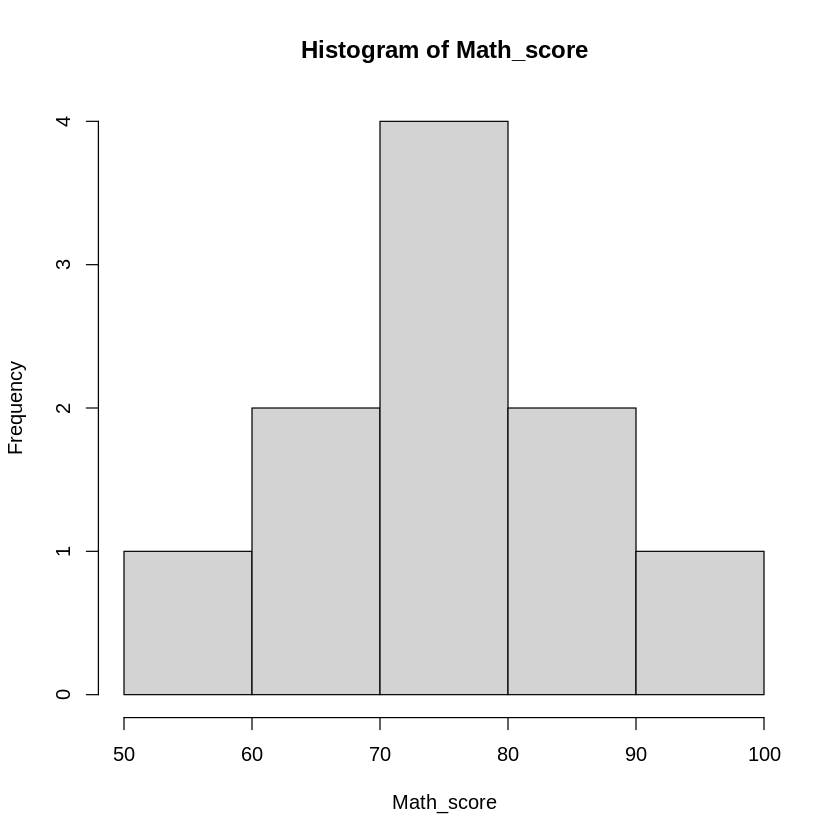

In [18]:
# 수학 점수(Math _score)
student_Name <- c("철수", "영희", "미영", "시완", "미경", "영환", "숙경", "부영", "민섭", "보연")
Math_score <- c(52, 92, 84, 71, 65, 81, 66, 77, 73, 74)
mean(Math_score)
hist(Math_score)

# 데이터 프레임 생성
score <- data.frame(student_Name, Math_score)
score

In [19]:
# cut 함수 사용()
# include.lowest = TRUE  :
# right = FALSE : a <= x < b 조건으로 등급 부여
# right = TRUE :  a < x <= b 
score <- transform(score, Math_grade_cut = cut(Math_score, breaks =c(0,60,70,80,90,100),
                  include.lowest = TRUE, 
                   right = FALSE,  
                  labels = c("F","D","C","B","A")))
              
score

student_Name,Math_score,Math_grade_cut
<chr>,<dbl>,<fct>
철수,52,F
영희,92,A
미영,84,B
시완,71,C
미경,65,D
영환,81,B
숙경,66,D
부영,77,C
민섭,73,C


In [21]:
# ifelse 

score <- transform(score, Math_grade_ifelse = ifelse(Math_score < 60, "F",
                                              ifelse(Math_score >=60 & Math_score < 70, "D",
                                              ifelse(Math_score >=70 & Math_score < 80, "C",
                                              ifelse(Math_score >=80 & Math_score < 90, "B",
                                              "A"
                                              ))))) 

score

student_Name,Math_score,Math_grade_cut,Math_grade_ifelse
<chr>,<dbl>,<fct>,<chr>
철수,52,F,F
영희,92,A,A
미영,84,B,B
시완,71,C,C
미경,65,D,D
영환,81,B,B
숙경,66,D,D
부영,77,C,C
민섭,73,C,C


In [ ]:
# 3. within 
# ??????????????????????
score <- within(score, {Math_grade_within = character(0)
        })

### 3. 차원축소 : PCA ( 주성분 분석 )
- 서로 상관성 높은 여러 변수들의 선형 조합으로 만든 새로운 변수들로 요약, 축소하는 기법
- 첫번째 주성분 : 전체 변동을 가장 많이 설명
- 두번째 주성분 : 첫번째 주성분과 상관성이 낮아 첫번째 주성분이 설명하지 못하는 나머지 변동을 정보의 손실 없이 가장 많이 설명할 수 있도록 변수들의 선형조합 만든다.



In [22]:
# 연속형 변수와 범주형 변수 분리
df <- iris[,-5]
df_species <- iris[,5]

head(df)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [27]:
# PCA 수행
pca_df <- prcomp(df, center = TRUE, scale. = TRUE)
# center = TRUE, sclae. = TRUE :: 표준화 (변수 간 단위 차이 없앰)
pca_df
# 결과 수치는 각 변수에 기여한 정도 

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

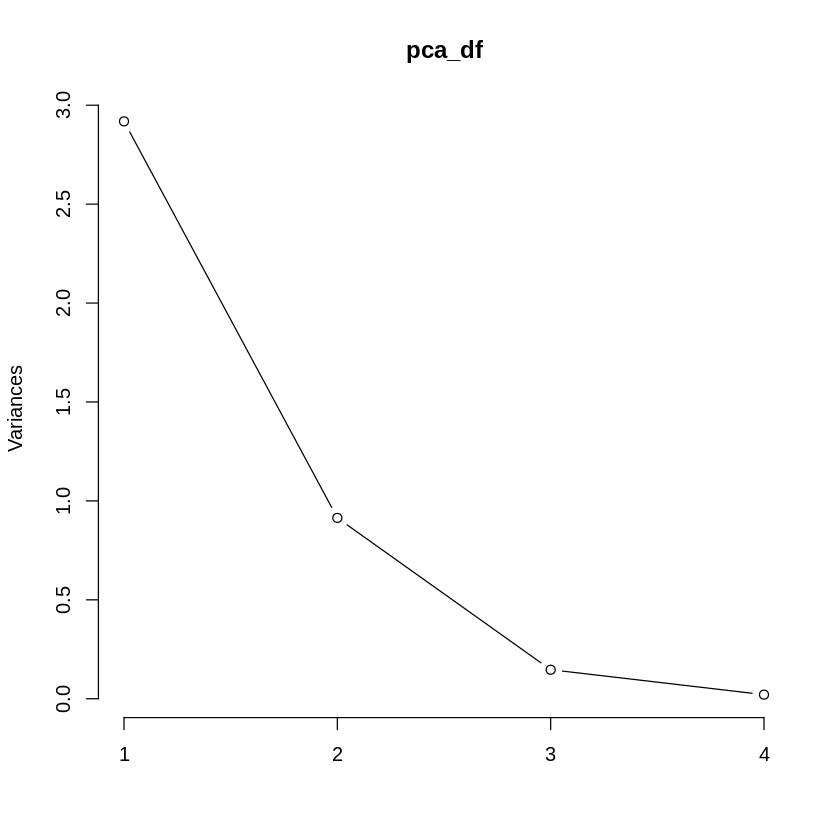

In [28]:
# 시각화
plot(pca_df, type="l")

In [29]:
summary(pca_df)
# 결과해석
# PC2 까지의 누적 비율 : 95.81 %
# PC1, PC2 두개만으로 데이터의 95.81 %를 설명할 수 있다.

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

### 4. 결측치 처리


1.   결측치 확인
  - is.na() => TRUE, FALSE 값 반환
  - sum(), summary()로 각 컬럼에 대한 결측치 파악
2.   결측치 제거
  - na.omit()
  - 결측치 행 반환 : complete.cases()
3.   결측치 대체
  - 0이나 평균값으로 대체
  - groupby() 그룹별 대체 

In [30]:
x<- c(1,2,3,4,NA,6,7,8,9,NA)
is.na(x)

[1] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE

In [33]:
# 결측치 확인
df = read.csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

sum(is.na(df))
summary(df)

[1] 177

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [35]:
# 결측치 제거
sum(df$Age)
mean(df$Age)
# NA 결측치 포함한 통계 함수 적용 -> NA 나옴

sum(df$Age, na.rm = TRUE)
mean(df$Age, na.rm = T)
# na.rm = T : 결측치 포함하지 않고 계산


[1] NA

[1] NA

[1] 21205.17

[1] 29.69912

In [36]:
# na.omit() 
df_1 <- na.omit(df)
dim(df_1) # 결측값 제거한 데이터프레임의 크기
dim(df)  # 기존 데이터 프레임의 크기

[1] 714  12

[1] 891  12

In [37]:
df_2 <- df[complete.cases(df[,c("Age")]),]
dim(df)
dim(df_2)

[1] 891  12

[1] 714  12

In [41]:
# 결측치 대체
head(df$Age,20)
sum(is.na(df$Age))

# 0 으로 대체
df_3 <-df
df_3$Age[is.na(df_3$Age)] <- 0 
head(df_3$Age,20)

# 평균으로 대체
df_4 <- df
df_4$Age[is.na(df_4$Age)] <- mean(df$Age, na.rm = T)
head(df_4$Age,20)

[1] 22 38 26 35 35 NA 54  2 27 14  4 58 20 39 14 55  2 NA 31 NA

[1] 177

[1] 22 38 26 35 35  0 54  2 27 14  4 58 20 39 14 55  2  0 31  0

[1] 22.00000 38.00000 26.00000 35.00000 35.00000 29.69912 54.00000  2.00000
 [9] 27.00000 14.00000  4.00000 58.00000 20.00000 39.00000 14.00000 55.00000
[17]  2.00000 29.69912 31.00000 29.69912

In [43]:
library(dplyr)

df = read.csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
# 성별 Age 평균
df %>% group_by(Sex) %>% summarise(Age = mean(Age, na.rm = T))
# Pclass별 Age 평균
df %>% group_by(Pclass) %>% summarise(Age = mean(Age, na.rm = T))


Sex,Age
<chr>,<dbl>
female,27.91571
male,30.72664


Pclass,Age
<int>,<dbl>
1,38.23344
2,29.87763
3,25.14062


In [44]:
tail(df,5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.45,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,,Q


In [45]:
# Pclass 그룹 별 Age 평균으로 결측치 대체
df <- df %>% group_by(Pclass) %>%
  mutate(Age = ifelse(is.na(Age), mean(Age, na.rm = T), Age)) 
tail(df,5)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.00,,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.45,,S
890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.00000,0,0,370376,7.75,,Q


### 5.이상치 처리

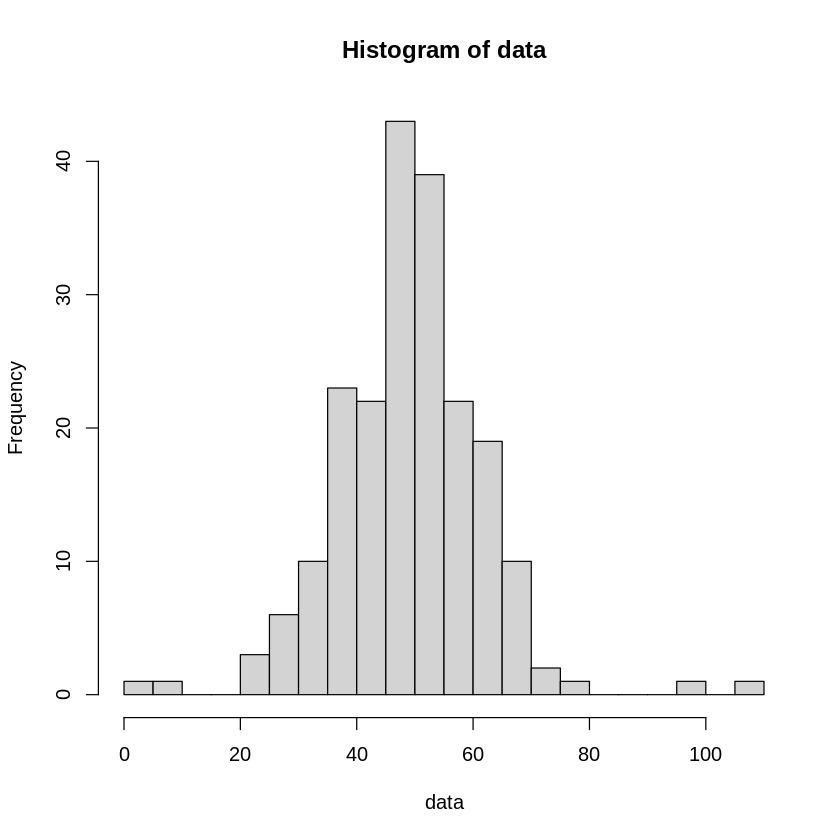

In [46]:
# 데이터 준비
data <- rnorm(200,mean =50, sd=10)

# 임의 이상치 삽입
data[201] = 2
data[202] = 100
data[203] = 10
data[204] = 110

#  분포 시각화
hist(data, breaks = 20)

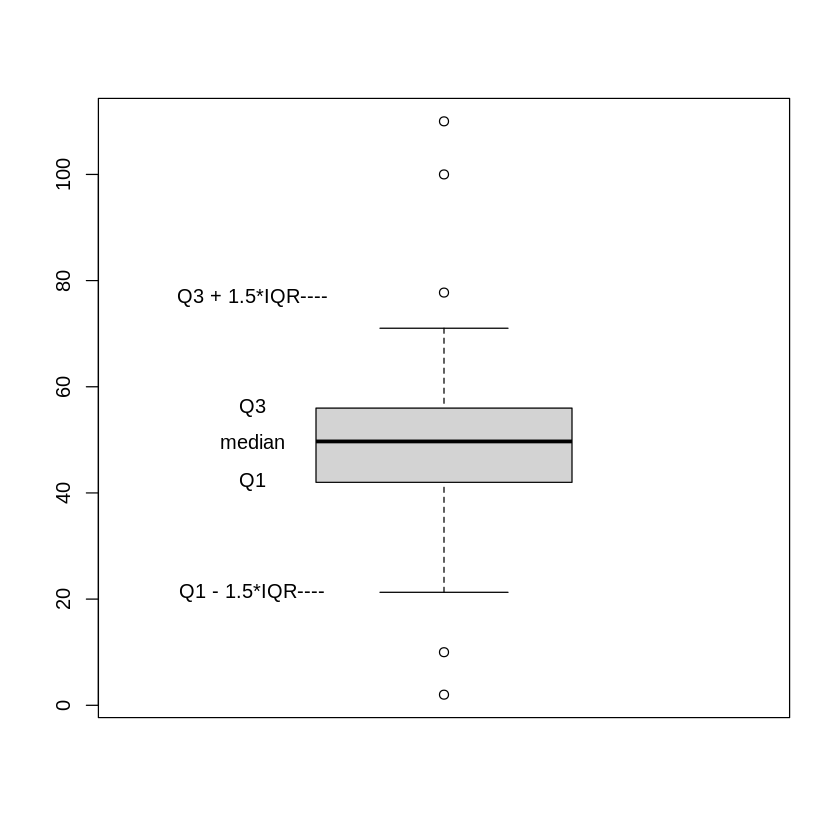

In [48]:
# boxplot() & fivenum() 
# fivenum(): 최소값, 제1사분위수, 중앙값, 제3사분위수, 최댓값 5가지 수치로 요약
# summary : 5 가지 수치 요약 + 평균
boxplot(data)

text(0.7, median(data), "median")
text(0.7, quantile(data)[2],"Q1")
text(0.7, quantile(data)[4],"Q3")
text(0.7, fivenum(data)[4] + 1.5*IQR(data),"Q3 + 1.5*IQR----")
text(0.7, fivenum(data)[2] - 1.5*IQR(data),"Q1 - 1.5*IQR----")

In [49]:
summary(data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   42.05   49.70   49.10   55.91  110.00 

In [50]:
quantile(data)

0%       25%       50%       75%      100% 
  2.00000  42.05397  49.70212  55.91111 110.00000

In [51]:
fivenum(data)

[1]   2.00000  41.99800  49.70212  55.98535 110.00000

In [52]:
# IQR = 3사분위수 - 1사분위수

UpperQ = fivenum(data)[4]
LowerQ = fivenum(data)[2]

IQR = UpperQ - LowerQ 

IQR


[1] 13.98734

In [56]:
# 이상치 : 3사분위수 + 1.5 * IQR  & 1사분위수 - 1.5*IQR
upperOutlier = data[ which(data > UpperQ+IQR*1.5) ]
lowerOutlier = data[ which(data < LowerQ-IQR*1.5) ]

lowerOutlier
upperOutlier

[1]  2 10

[1]  77.74199 100.00000 110.00000

### 6. 평활화
  - 데이터의 추세 알기
  - 필터링 수행

* 이동평균 (MA): 

In [57]:
data(lynx)  # 캐나다 시라소니 수에 대한 시계열 데이터
head(lynx,10)
str(lynx)
summary(lynx)

[1]  269  321  585  871 1475 2821 3928 5943 4950 2577

 Time-Series [1:114] from 1821 to 1934: 269 321 585 871 1475 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   39.0   348.2   771.0  1538.0  2566.8  6991.0 

- ts.plot : 각 속성의 데이터를 한번에 나타내 줌. 시계열 나누는 plot
- 단순이동평균: SMA(x, n=10,,,)
  - x: 변환 데이터
  - n: 평균 기간
  - TTR 라이브러리 필요

In [58]:
# 단순이동평균 : SMA

install.packages("TTR")
library(TTR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’




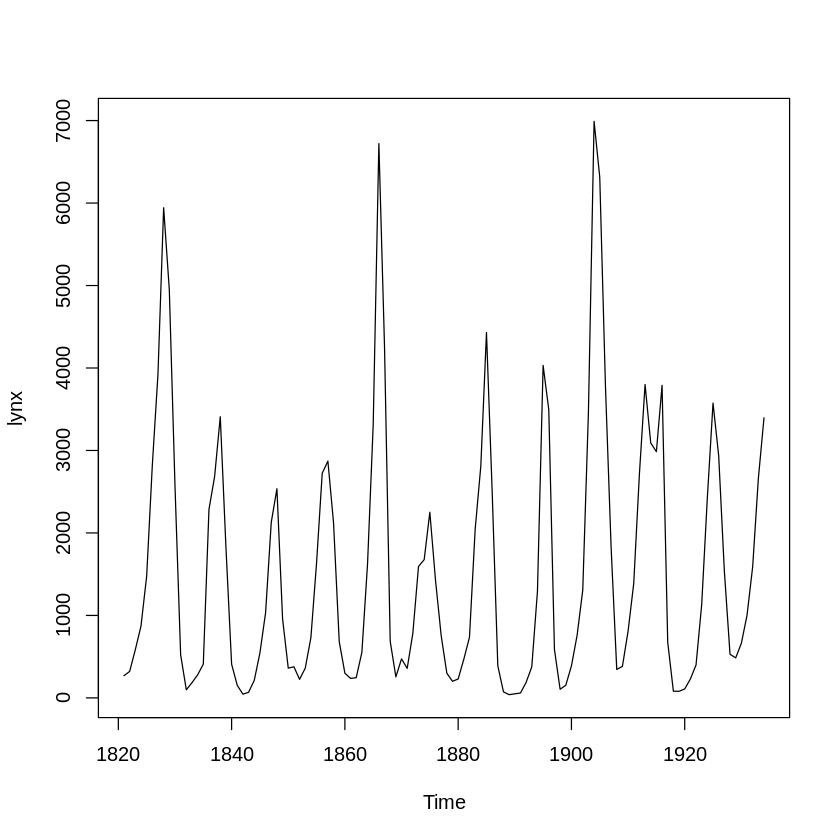

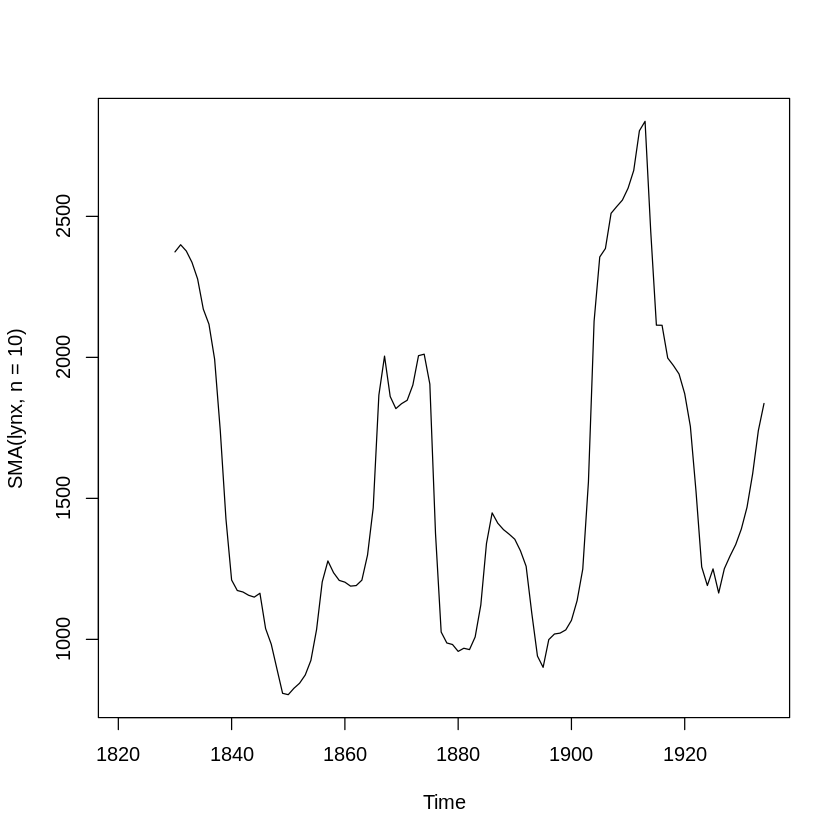

In [59]:
# 원시 데이터
ts.plot(lynx)
# 10년 단순이동 평균 그림
ts.plot(SMA(lynx,n=10))

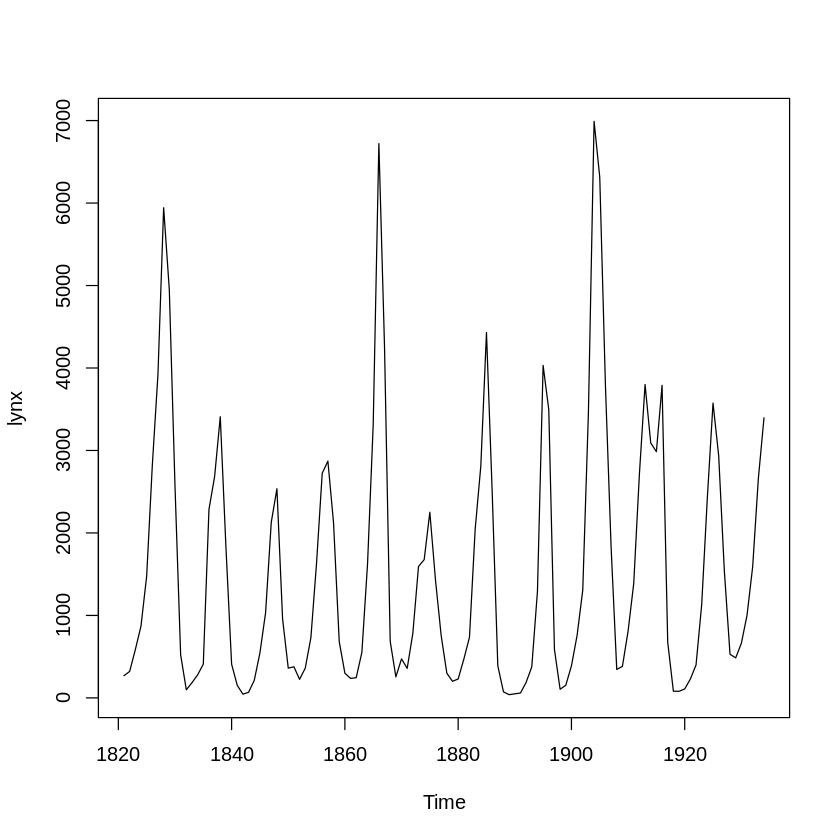

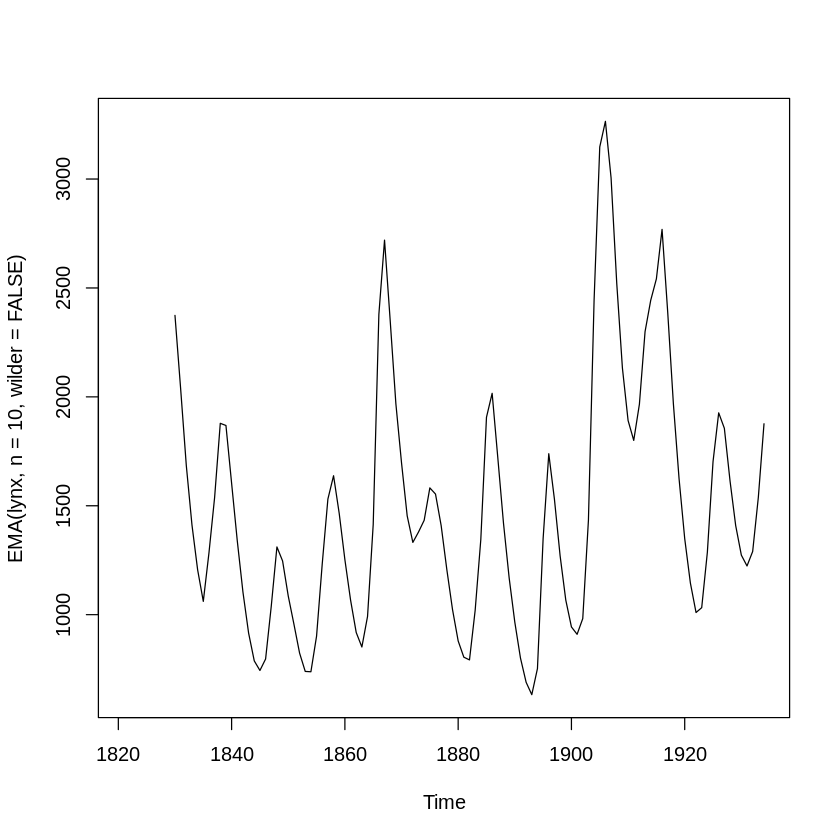

In [60]:
# 지수가중이동 평균
# --> 최근데이터에 가중치 부여하여 이동평균. 가중치를 지수함수형태로
# EMA(x,n=10, wilder = FALSE)
# x : 변환데이터, n : 평균기간
ts.plot(lynx)

ts.plot(EMA(lynx, n=10, wilder = FALSE))